задание 1

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Генерация датасета с помощью make_blobs
X, y = make_blobs(n_samples=3000, centers=3, n_features=4, random_state=42)

# Создание DataFrame
df1 = pd.DataFrame(X, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4'])
df1['class'] = y

# Отображение первых строк сгенерированного датасета
df1.head()


,feature_1,feature_2,feature_3,feature_4,class
0,1.717955,3.848523,-8.969754,11.383873,2
1,2.621390,4.337125,-10.556794,8.016428,2
2,-5.240667,-5.972087,-9.545767,9.533379,1
3,-2.283934,9.707009,3.370548,3.675684,0
4,-3.652217,9.834444,4.575190,2.046044,0


задание 2

         feature_1    feature_2    feature_3    feature_4        class
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean     -2.438740     2.079648    -4.626291     6.238737     1.000000
std       3.758897     6.764158     6.627150     3.275081     0.816633
min     -10.100644   -10.481195   -13.510710    -1.017966     0.000000
25%      -6.131012    -6.272828    -9.604578     2.665286     0.000000
50%      -2.455206     4.128959    -8.561488     7.300362     1.000000
75%       1.364304     8.337166     3.957308     8.924860     2.000000
max       5.399683    12.867018     7.791936    12.096526     2.000000
           feature_1  feature_2  feature_3  feature_4     class
feature_1   1.000000   0.639426  -0.052642   0.257931  0.488773
feature_2   0.639426   1.000000   0.687744  -0.492235 -0.295303
feature_3  -0.052642   0.687744   1.000000  -0.915680 -0.878153
feature_4   0.257931  -0.492235  -0.915680   1.000000  0.923059
class       0.488773  -0.295303  -0.87815

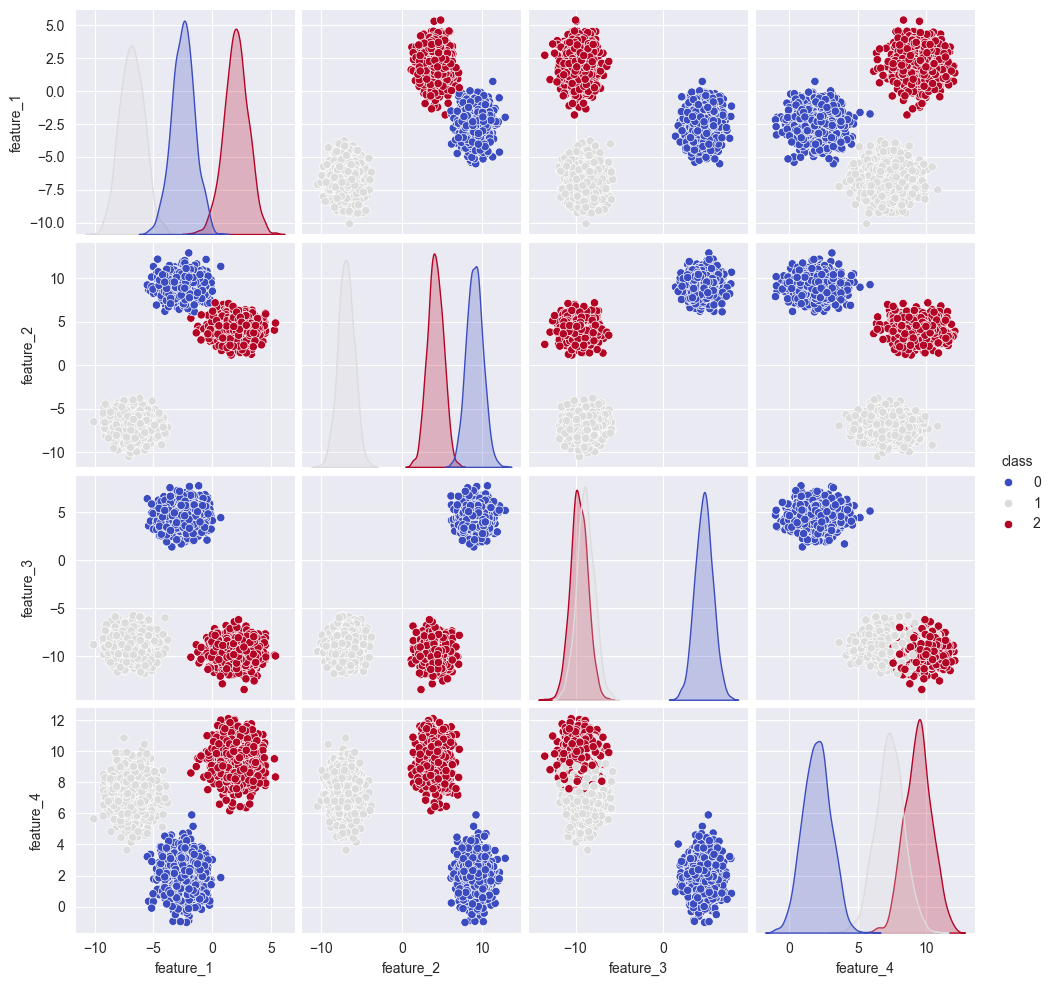

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Шаг 1: Создание датасета
X, y = make_blobs(n_samples=3000, centers=3, n_features=4, random_state=42)
df1 = pd.DataFrame(X, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4'])
df1['class'] = y

# Ключевые характеристики датасета
print(df1.describe())

# Корреляционный анализ
correlation_matrix = df1.corr()
print(correlation_matrix)

# Визуализация парных отношений между переменными
sns.pairplot(df1, hue='class', palette='coolwarm')
plt.show()


задание 3

In [34]:
import pandas as pd

# Разделяем df1 на классы
class_0 = df1[df1['class'] == 0]
class_1 = df1[df1['class'] == 1]
class_2 = df1[df1['class'] == 2]

# Функция для генерации датасетов с повторениями одного класса
def generate_datasets(base_class, class_name, repeat_factors):
    datasets = {}
    for factor in repeat_factors:
        repeated_class = pd.concat([base_class] * factor, ignore_index=True)
        df = pd.concat([repeated_class, class_1, class_2], ignore_index=True)
        datasets[f'df{factor}'] = df
    return datasets

# Указываем сколько раз нужно повторить первый класс
repeat_factors = [2, 5, 10, 20, 50, 100, 1000, 10000]

# Генерация датасетов с различными повторениями класса 0
datasets = generate_datasets(class_0, 'class_0', repeat_factors)

# Пример: просмотр первых строк датасета df2
print(datasets['df2'].head())


   feature_1  feature_2  feature_3  feature_4  class
0  -2.283934   9.707009   3.370548   3.675684      0
1  -3.652217   9.834444   4.575190   2.046044      0
2  -1.286115   8.755432   4.992384   1.402818      0
3  -3.431057   8.010329   4.847146   2.042514      0
4  -3.436128   8.954761   1.398611   0.948782      0


задание 4

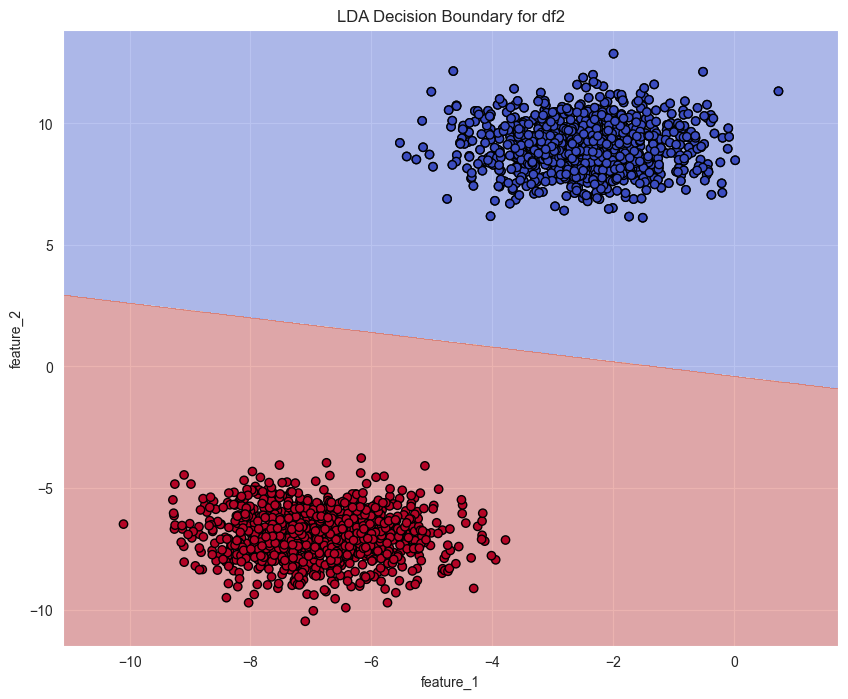

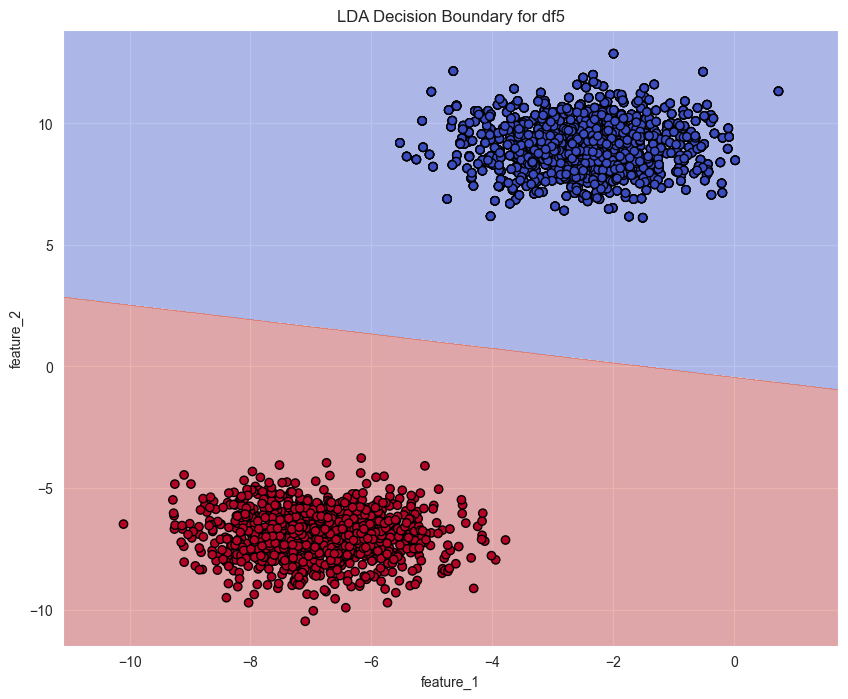

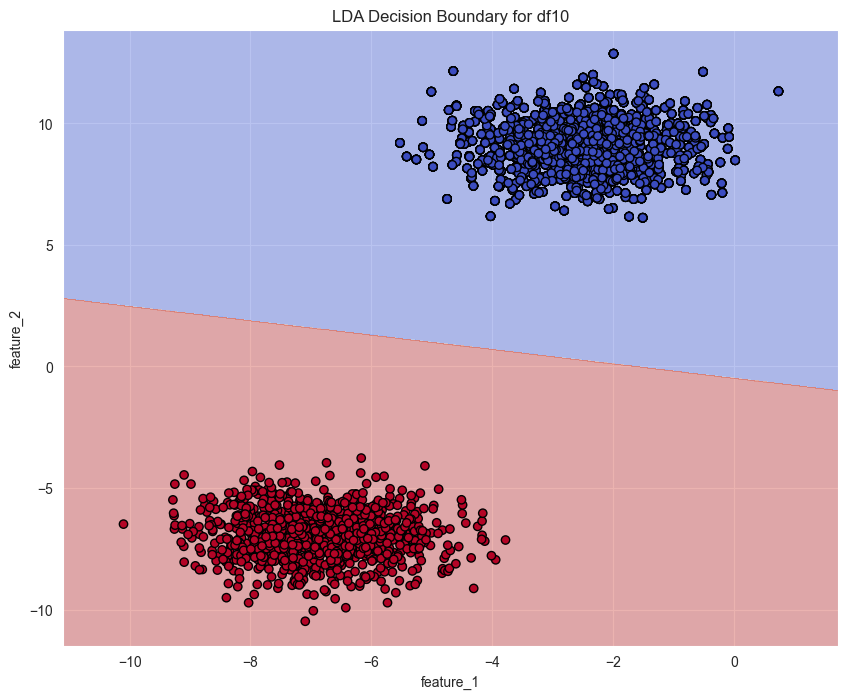

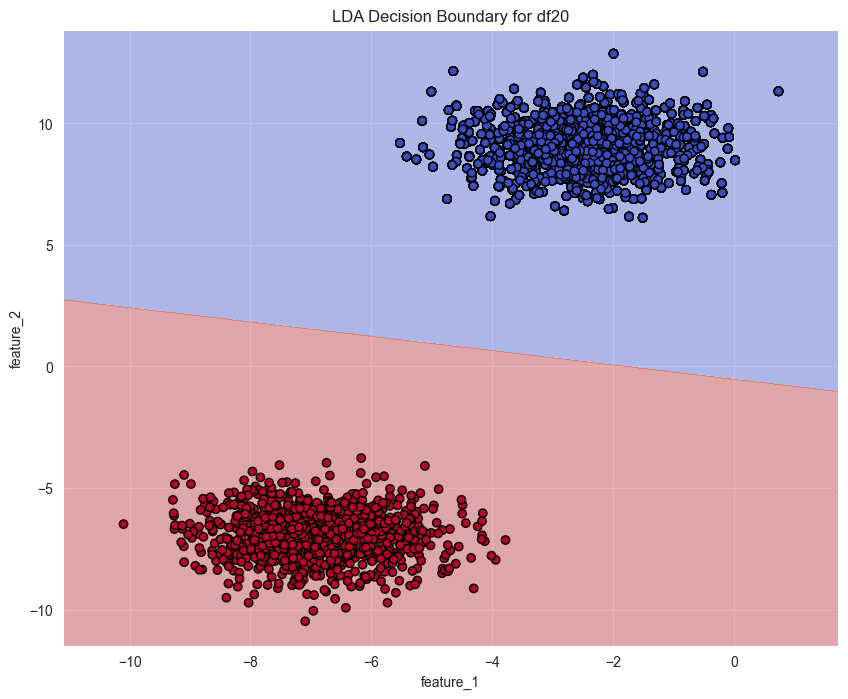

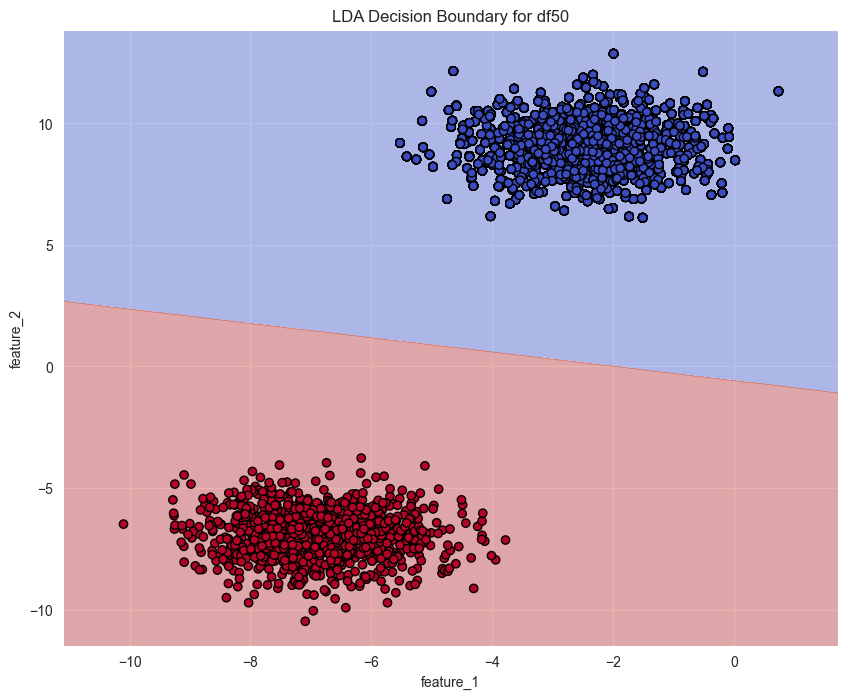

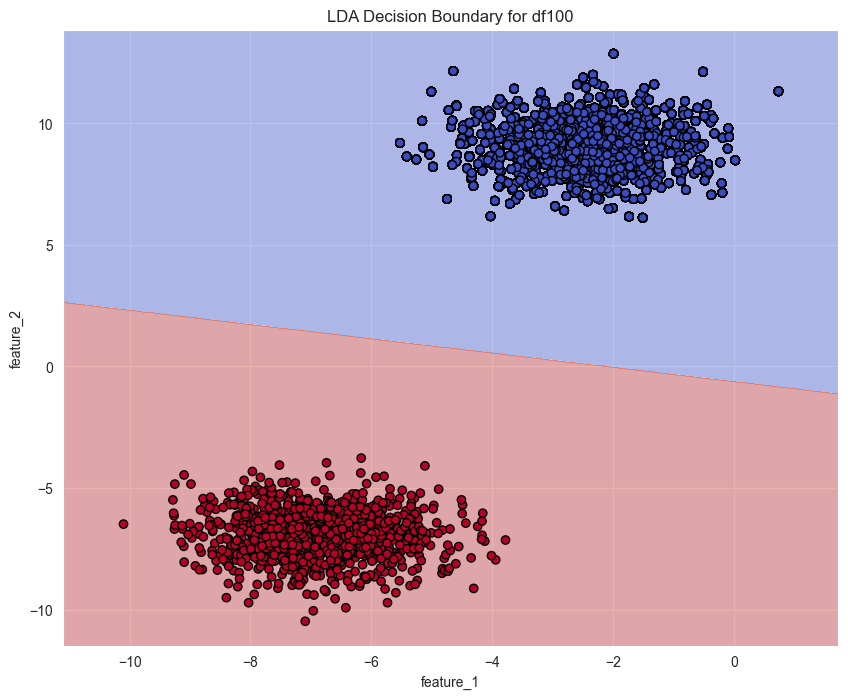

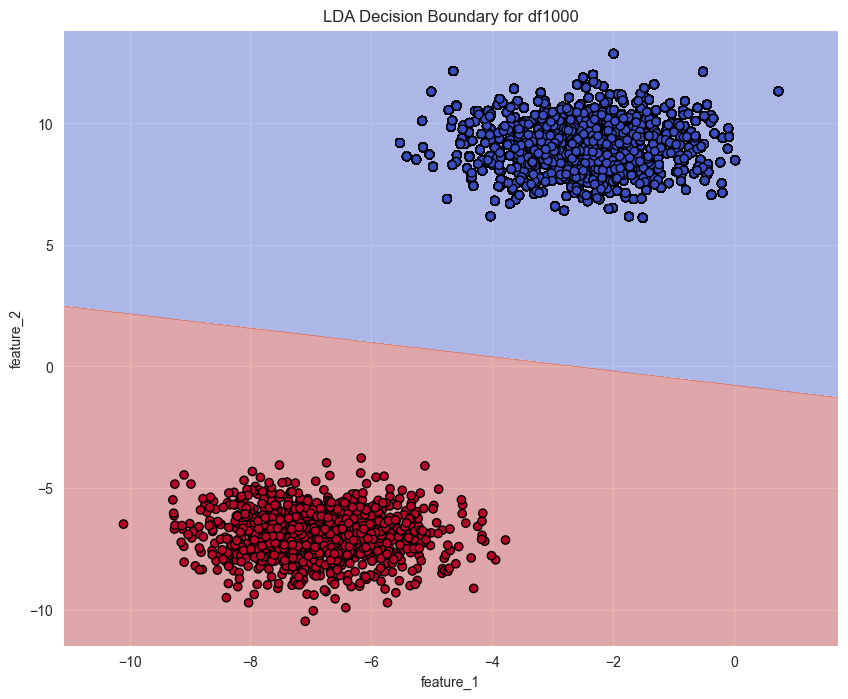

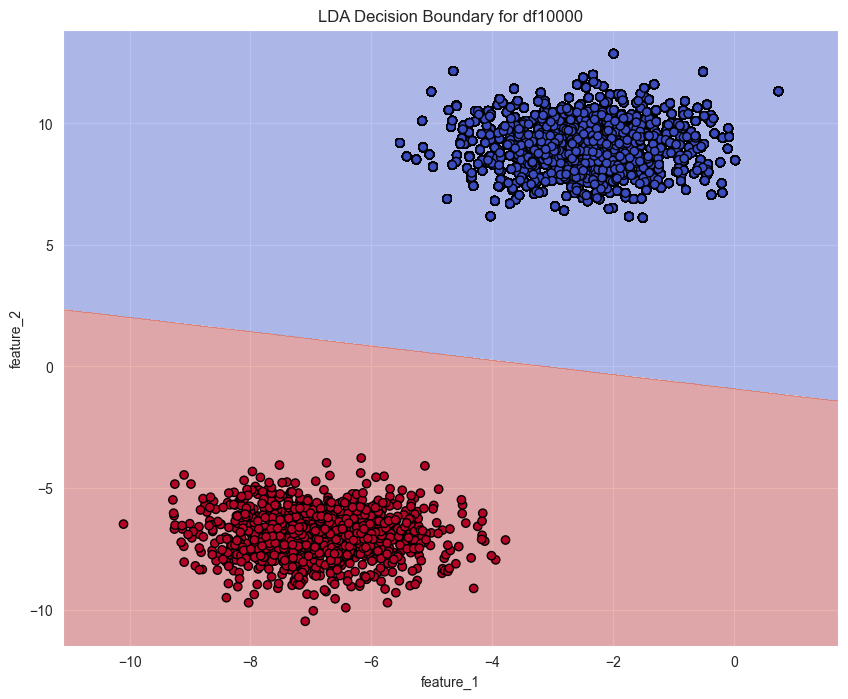

In [35]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Функция для построения решающей функции
def plot_lda_decision_boundary(lda, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    ax.set_title('LDA Decision Boundary')

# Функция для обработки каждого датасета и построения графиков
def process_and_plot_lda(datasets, feature_cols, class_col, selected_classes):
    for name, df in datasets.items():
        # Фильтрация данных по выбранным классам
        filtered_df = df[df[class_col].isin(selected_classes)]
        
        # Выбор двух количественных признаков
        X = filtered_df[feature_cols].values
        y = filtered_df[class_col].values
        
        # Применение LDA
        lda = LDA()
        lda.fit(X, y)
        
        # Визуализация решающей функции
        fig, ax = plt.subplots(figsize=(10, 8))
        plot_lda_decision_boundary(lda, X, y, ax)
        plt.xlabel(feature_cols[0])
        plt.ylabel(feature_cols[1])
        plt.title(f'LDA Decision Boundary for {name}')
        plt.show()

# Параметры для выполнения
feature_cols = ['feature_1', 'feature_2']  # Замените на реальные названия признаков
class_col = 'class'  # Название колонки с классами
selected_classes = [0, 1]  # Выбираем классы 0 и 1

# Применение к каждому датасету
process_and_plot_lda(datasets, feature_cols, class_col, selected_classes)


задание 5

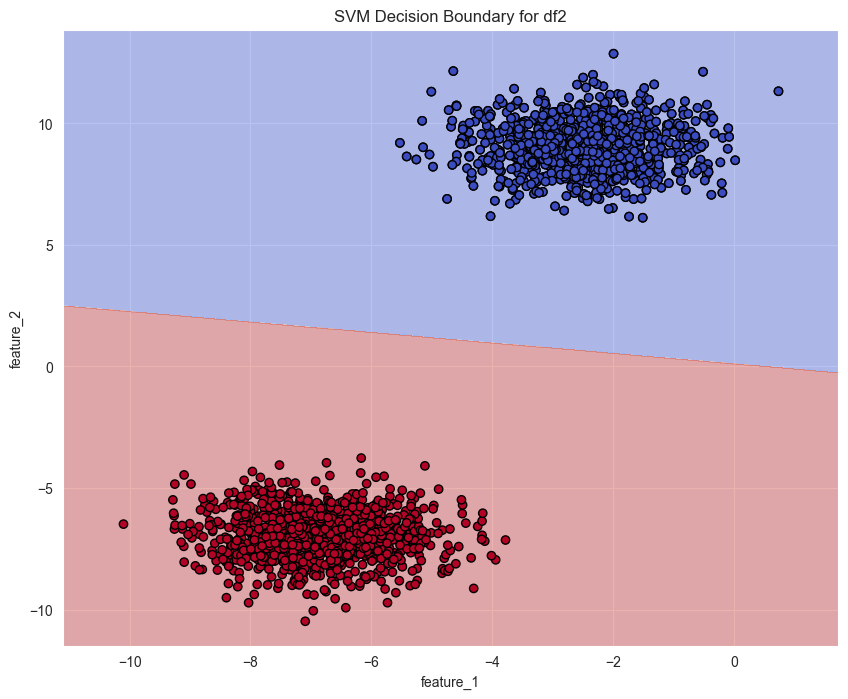

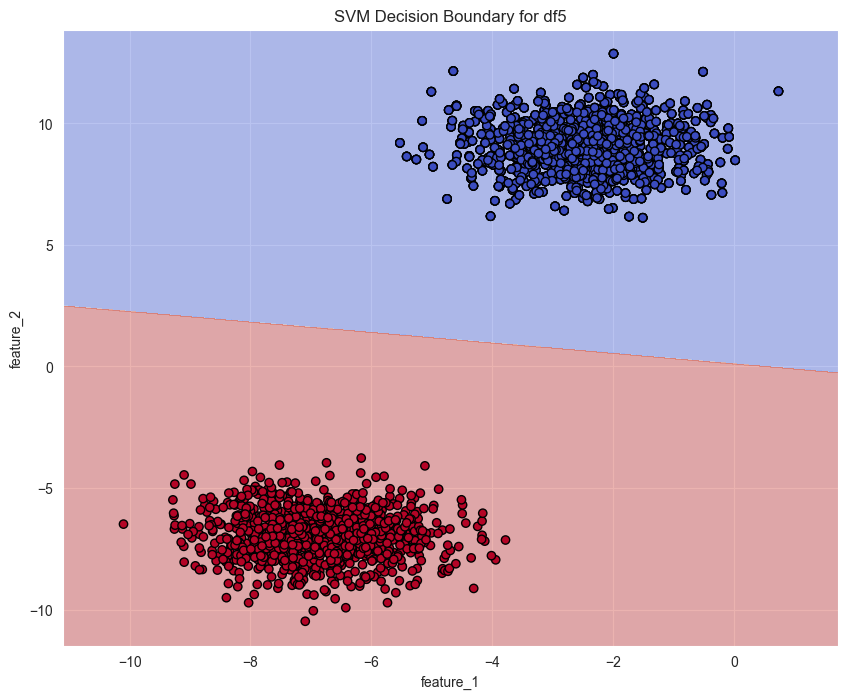

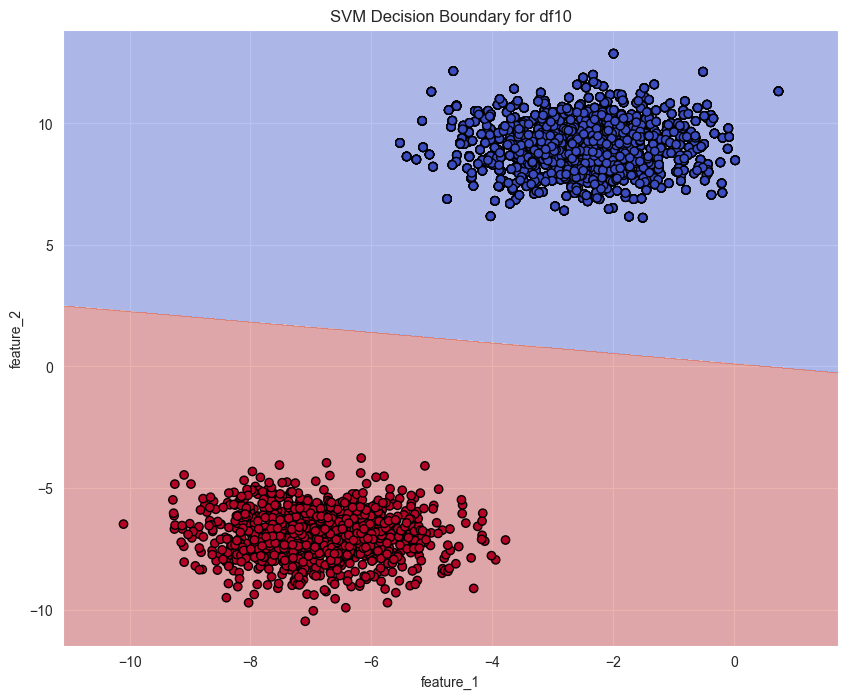

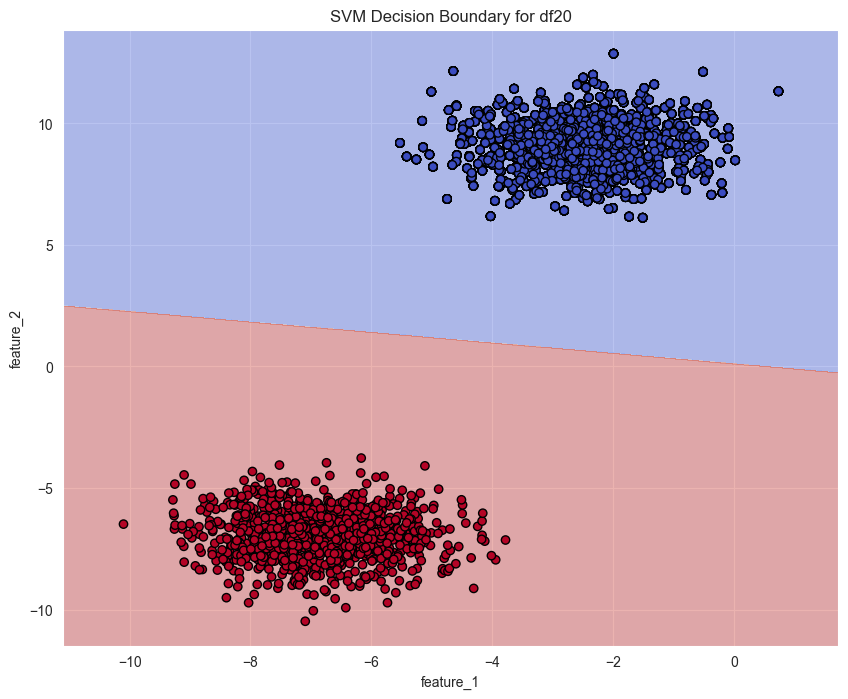

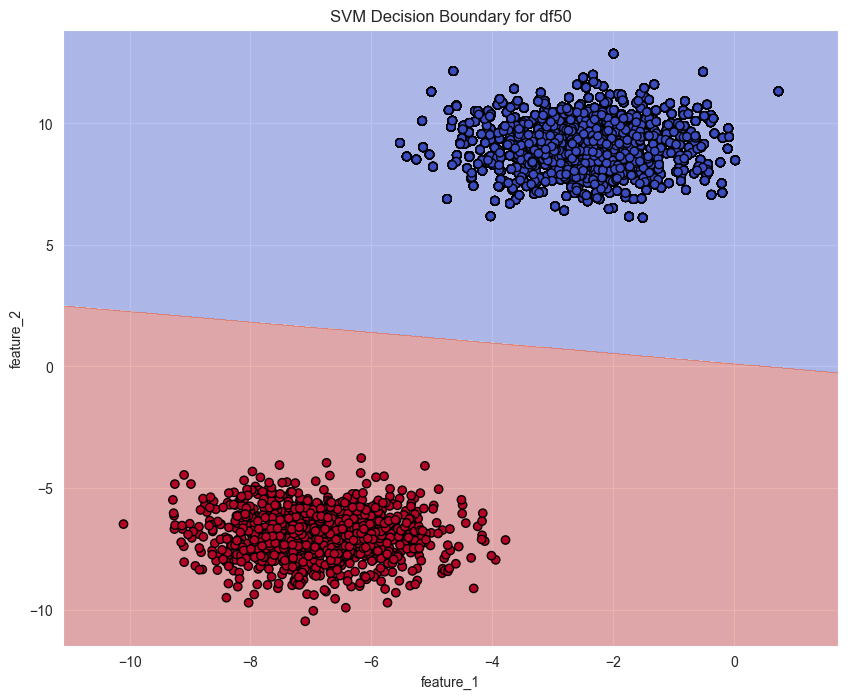

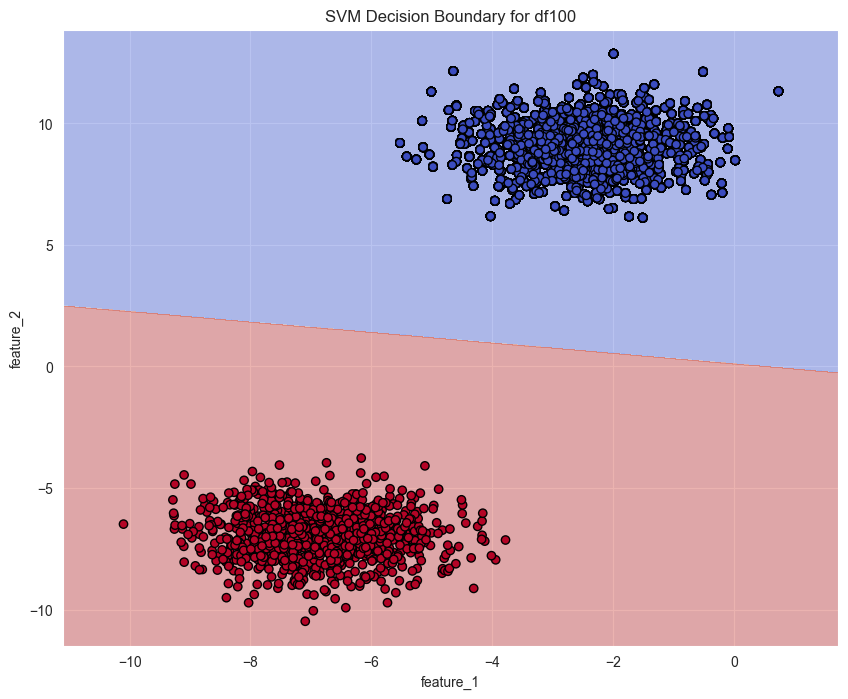

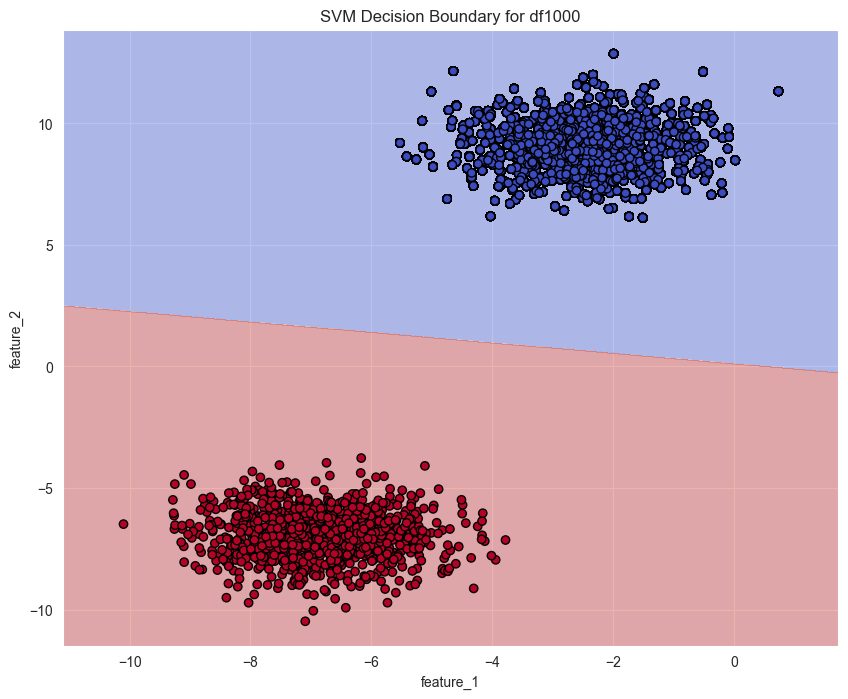

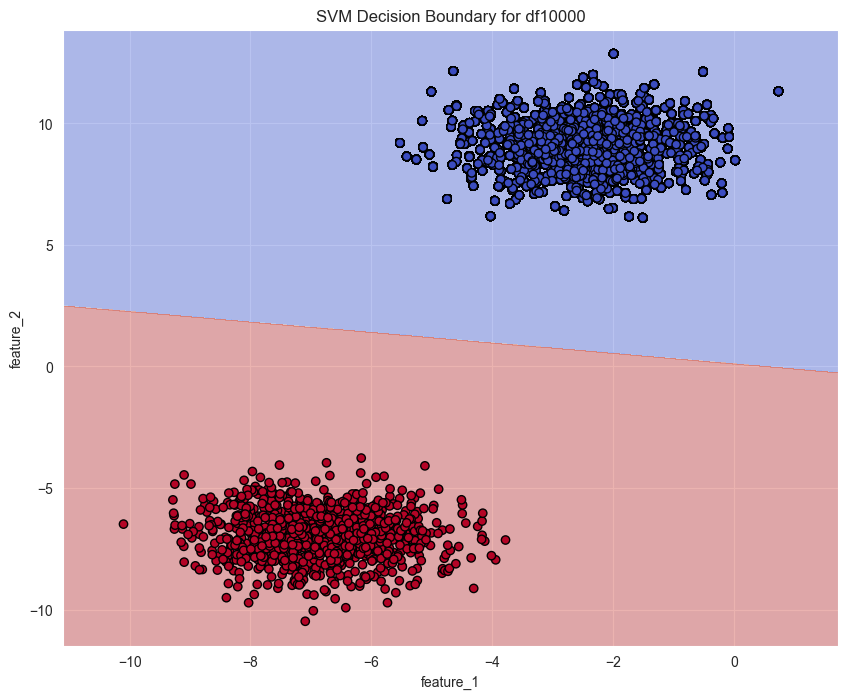

In [36]:
from sklearn.svm import SVC

# Функция для построения решающей функции SVM
def plot_svm_decision_boundary(svm, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    ax.set_title('SVM Decision Boundary')

# Функция для обработки каждого датасета и построения графиков с SVM
def process_and_plot_svm(datasets, feature_cols, class_col, selected_classes):
    for name, df in datasets.items():
        # Фильтрация данных по выбранным классам
        filtered_df = df[df[class_col].isin(selected_classes)]
        
        # Выбор двух количественных признаков
        X = filtered_df[feature_cols].values
        y = filtered_df[class_col].values
        
        # Применение SVM
        svm = SVC(kernel='linear')  # Используем линейное ядро для SVM
        svm.fit(X, y)
        
        # Визуализация решающей функции
        fig, ax = plt.subplots(figsize=(10, 8))
        plot_svm_decision_boundary(svm, X, y, ax)
        plt.xlabel(feature_cols[0])
        plt.ylabel(feature_cols[1])
        plt.title(f'SVM Decision Boundary for {name}')
        plt.show()

# Параметры для выполнения
feature_cols = ['feature_1', 'feature_2']  # Замените на реальные названия признаков
class_col = 'class'  # Название колонки с классами
selected_classes = [0, 1]  # Выбираем классы 0 и 1

# Применение к каждому датасету
process_and_plot_svm(datasets, feature_cols, class_col, selected_classes)


задание 6

ValueError: x and y must have same first dimension, but have shapes (9,) and (8,)

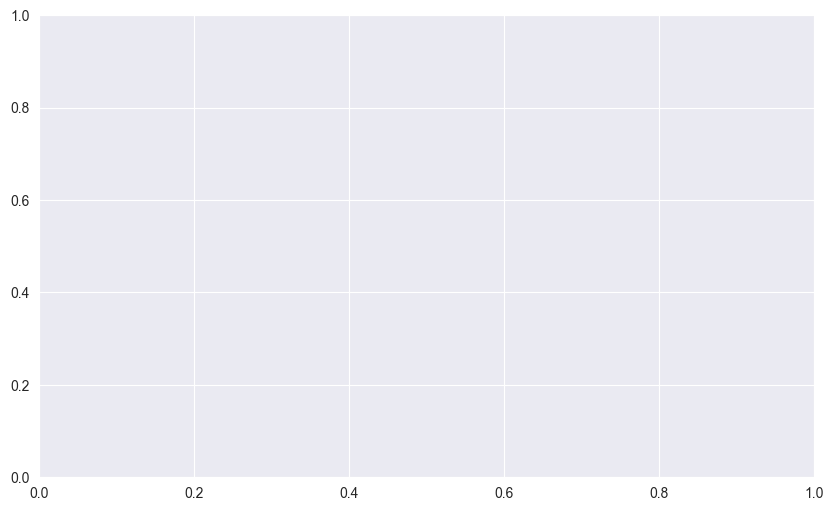

In [37]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC

# Функция для расчета центров масс классов
def calculate_centroids(X, y):
    class_0 = X[y == 0]
    class_1 = X[y == 1]
    centroid_0 = np.mean(class_0, axis=0)
    centroid_1 = np.mean(class_1, axis=0)
    return centroid_0, centroid_1

# Функция для нахождения общего центра масс
def calculate_center_of_mass(X):
    return np.mean(X, axis=0)

# Функция для нахождения пересечения решающей функции и отрезка центров масс
def find_intersection(svm, centroid_0, centroid_1):
    w = svm.coef_[0]
    b = svm.intercept_[0]
    # Уравнение решающей границы: w1 * x + w2 * y + b = 0
    # Уравнение отрезка центров масс: (x - x0) / (x1 - x0) = (y - y0) / (y1 - y0)
    
    # Преобразуем уравнения для нахождения пересечения
    x_c = np.linspace(centroid_0[0], centroid_1[0], 100)
    y_c = np.linspace(centroid_0[1], centroid_1[1], 100)
    
    for x, y in zip(x_c, y_c):
        if np.isclose(w[0] * x + w[1] * y + b, 0, atol=1e-4):
            return np.array([x, y])
    return None

# Функция для обработки каждого датасета и расчета координат
def process_datasets_for_centroids(datasets, feature_cols, class_col, selected_classes):
    results = []
    
    for name, df in datasets.items():
        filtered_df = df[df[class_col].isin(selected_classes)]
        X = filtered_df[feature_cols].values
        y = filtered_df[class_col].values

        # Расчет центров масс
        centroid_0, centroid_1 = calculate_centroids(X, y)
        center_of_mass = calculate_center_of_mass(X)
        center_of_segment = (centroid_0 + centroid_1) / 2
        
        # Применение SVM
        svm = SVC(kernel='linear')
        svm.fit(X, y)
        
        # Поиск точки пересечения
        intersection_point = find_intersection(svm, centroid_0, centroid_1)
        
        # Сохранение результатов
        results.append({
            'dataset': name,
            'centroid_0': centroid_0,
            'centroid_1': centroid_1,
            'center_of_segment': center_of_segment,
            'center_of_mass': center_of_mass,
            'intersection_point': intersection_point
        })
    
    return pd.DataFrame(results)

# Параметры
feature_cols = ['feature_1', 'feature_2']  # Замените на реальные названия признаков
class_col = 'class'  # Название колонки с классами
selected_classes = [0, 1]  # Классы для анализа

# Обработка всех датасетов
results_df = process_datasets_for_centroids(datasets, feature_cols, class_col, selected_classes)

# Визуализация зависимости от количества повторов
replications = [1, 2, 5, 10, 20, 50, 100, 1000, 10000]

# Пример визуализации координат центра отрезка
plt.figure(figsize=(10, 6))
plt.plot(replications, results_df['center_of_segment'].apply(lambda x: x[0]), label='X координата центра отрезка')
plt.plot(replications, results_df['center_of_segment'].apply(lambda x: x[1]), label='Y координата центра отрезка')
plt.xlabel('Количество повторов объектов одного класса')
plt.ylabel('Координаты центра отрезка')
plt.title('Зависимость координат центра отрезка от количества повторов')
plt.legend()
plt.show()


задание 7

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import average_precision_score

# Функция для построения ROC и PR кривых
def plot_curves(y_true, y_scores, ax):
    # ROC кривая
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # PR кривая
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = average_precision_score(y_true, y_scores)

    # Построение ROC кривой
    ax[0].plot(fpr, tpr, label=f'ROC (area = {roc_auc:.2f})')
    ax[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[0].set_title('ROC Curve')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].legend(loc='lower right')

    # Построение PR кривой
    ax[1].plot(recall, precision, label=f'PR (area = {pr_auc:.2f})')
    ax[1].set_title('Precision-Recall Curve')
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].legend(loc='lower left')

    return roc_auc, pr_auc

# Функция для построения PRgain
def plot_prgain(y_true, y_scores, ax):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    
    # Вычисляем PRgain
    prgain = precision / np.maximum(1e-10, precision)
    ax.plot(recall, prgain, label='PR Gain')
    ax.set_title('Precision Gain Curve')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision Gain')
    ax.legend(loc='lower left')

# Обработка датасетов и построение кривых
results = []  # Список для хранения результатов

for dataset_name, df in datasets.items():
    filtered_df = df[df[class_col].isin(selected_classes)]
    X = filtered_df[feature_cols].values
    y = filtered_df[class_col].values

    # Применение LDA
    lda = LDA()
    lda.fit(X, y)
    lda_probs = lda.predict_proba(X)[:, 1]  # Вероятности для целевого класса

    # Применение SVM
    svm = SVC(kernel='linear', probability=True)
    svm.fit(X, y)
    svm_probs = svm.predict_proba(X)[:, 1]  # Вероятности для целевого класса

    # Создание графиков
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))

    # ROC и PR кривые для LDA
    roc_auc_lda, pr_auc_lda = plot_curves(y, lda_probs, ax[0])
    
    # ROC и PR кривые для SVM
    roc_auc_svm, pr_auc_svm = plot_curves(y, svm_probs, ax[1])
    
    # PRgain кривая для LDA
    plot_prgain(y, lda_probs, ax[1, 0])
    
    # PRgain кривая для SVM
    plot_prgain(y, svm_probs, ax[1, 1])

    plt.suptitle(f'Dataset: {dataset_name}')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Сохранение результатов
    results.append({
        'dataset': dataset_name,
        'AUROC_LDA': roc_auc_lda,
        'AUPRC_LDA': pr_auc_lda,
        'AUROC_SVM': roc_auc_svm,
        'AUPRC_SVM': pr_auc_svm
    })

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)
print(results_df)


задание 8

In [ ]:
# Выбор другого целевого класса
new_target_class = 'Class_X'  # Замените на название нового класса

# Функция для обработки и построения кривых
def analyze_and_plot_curves(datasets, target_class):
    results = []  # Список для хранения результатов

    for dataset_name, df in datasets.items():
        filtered_df = df[df[class_col] == target_class]  # Фильтрация по новому классу
        X = filtered_df[feature_cols].values
        y = filtered_df[class_col].values

        # Проверяем, чтобы не было пустого датасета
        if len(y) == 0:
            print(f'Нет данных для целевого класса {target_class} в датасете {dataset_name}')
            continue

        # Применение LDA
        lda = LDA()
        lda.fit(X, y)
        lda_probs = lda.predict_proba(X)[:, 1]  # Вероятности для целевого класса

        # Применение SVM
        svm = SVC(kernel='linear', probability=True)
        svm.fit(X, y)
        svm_probs = svm.predict_proba(X)[:, 1]  # Вероятности для целевого класса

        # Создание графиков
        fig, ax = plt.subplots(2, 2, figsize=(12, 10))

        # ROC и PR кривые для LDA
        roc_auc_lda, pr_auc_lda = plot_curves(y, lda_probs, ax[0])
        
        # ROC и PR кривые для SVM
        roc_auc_svm, pr_auc_svm = plot_curves(y, svm_probs, ax[1])
        
        # PRgain кривая для LDA
        plot_prgain(y, lda_probs, ax[1, 0])
        
        # PRgain кривая для SVM
        plot_prgain(y, svm_probs, ax[1, 1])

        plt.suptitle(f'Dataset: {dataset_name} | Target Class: {target_class}')
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.show()

        # Сохранение результатов
        results.append({
            'dataset': dataset_name,
            'AUROC_LDA': roc_auc_lda,
            'AUPRC_LDA': pr_auc_lda,
            'AUROC_SVM': roc_auc_svm,
            'AUPRC_SVM': pr_auc_svm
        })

    # Преобразование результатов в DataFrame
    results_df = pd.DataFrame(results)
    print(results_df)

# Вызов функции для нового целевого класса
analyze_and_plot_curves(datasets, new_target_class)


задание 9

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt


def cross_validate_and_plot_curves(X, y, n_folds_list, model):
    results_auroc = []
    results_auprc = []

    for n_folds in n_folds_list:
        skf = StratifiedKFold(n_splits=n_folds)
        auroc_scores = []
        auprc_scores = []
        
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            model.fit(X_train, y_train)
            y_probs = model.predict_proba(X_test)[:, 1]
            
            # Calculate AUROC and AUPRC
            auroc = roc_auc_score(y_test, y_probs)
            auprc = average_precision_score(y_test, y_probs)
            auroc_scores.append(auroc)
            auprc_scores.append(auprc)
        
        results_auroc.append(auroc_scores)
        results_auprc.append(auprc_scores)

    return results_auroc, results_auprc

def plot_curves_with_ci(n_folds_list, results_auroc, results_auprc):
    for i, n_folds in enumerate(n_folds_list):
        # AUROC plot
        mean_auroc = np.mean(results_auroc[i])
        std_auroc = np.std(results_auroc[i])
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(mean_auroc, label=f'AUROC (Mean ± CI95) for {n_folds}-fold')
        plt.fill_between(range(len(results_auroc[i])),
                         mean_auroc - 1.96 * std_auroc,
                         mean_auroc + 1.96 * std_auroc,
                         alpha=0.2)
        plt.title('AUROC with CI95')
        plt.xlabel('Fold')
        plt.ylabel('AUROC')
        plt.legend()

        # AUPRC plot
        mean_auprc = np.mean(results_auprc[i])
        std_auprc = np.std(results_auprc[i])
        plt.subplot(1, 2, 2)
        plt.plot(mean_auprc, label=f'AUPRC (Mean ± CI95) for {n_folds}-fold')
        plt.fill_between(range(len(results_auprc[i])),
                         mean_auprc - 1.96 * std_auprc,
                         mean_auprc + 1.96 * std_auprc,
                         alpha=0.2)
        plt.title('AUPRC with CI95')
        plt.xlabel('Fold')
        plt.ylabel('AUPRC')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Пример использования
X_10k = df10k[feature_cols].values
y_10k = df10k[class_col].values

n_folds_list = [3, 5, 10, 20, 50, 100]
model = LDA()  # или SVC для SVM

results_auroc, results_auprc = cross_validate_and_plot_curves(X_10k, y_10k, n_folds_list, model)
plot_curves_with_ci(n_folds_list, results_auroc, results_auprc)
